In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import warnings
warnings.filterwarnings("ignore")
from add_features import prepare_df, add_features, CONFIG

In [14]:
in_folder_path = "../data/Kraken_cleaned/"
out_folder_path = "../data/Kraken_features/"
all_files = os.listdir(in_folder_path)
for file in all_files:
    df = prepare_df(in_folder_path + file)
    df = add_features(df, CONFIG)
    if len(df) == 0:
        print(f"Skipping {file} due to insufficient data.")
        continue
    df.to_parquet(out_folder_path + file)

Skipping USDRUSD_720.parquet due to insufficient data.
Skipping KUSD_720.parquet due to insufficient data.
Skipping B3USD_720.parquet due to insufficient data.
Skipping APENFTUSD_720.parquet due to insufficient data.
Skipping WALUSD_720.parquet due to insufficient data.
Skipping CORNUSD_720.parquet due to insufficient data.
Skipping ANONUSD_720.parquet due to insufficient data.
Skipping AEROUSD_720.parquet due to insufficient data.
Skipping BMTUSD_720.parquet due to insufficient data.
Skipping EUROPUSD_720.parquet due to insufficient data.
Skipping DUCKUSD_720.parquet due to insufficient data.
Skipping UFDUSD_720.parquet due to insufficient data.
Skipping NILUSD_720.parquet due to insufficient data.
Skipping TERMUSD_720.parquet due to insufficient data.
Skipping LSETHUSD_720.parquet due to insufficient data.
Skipping EURRUSD_720.parquet due to insufficient data.
Skipping AVAAIUSD_720.parquet due to insufficient data.
Skipping ELXUSD_720.parquet due to insufficient data.
Skipping LAYERU

In [8]:
train_dfs, test_dfs = create_time_series_splits(df)

In [9]:
all_preds = []
all_targets = []
for train_df, test_df in zip(train_dfs, test_dfs):
    X_train = train_df.drop(columns = ['date'])[:-1]
    y_train = train_df['log_return'][1:]

    X_test = test_df.drop(columns = ['date'])[:-1]
    y_test = test_df['log_return'][1:]

    model = RandomForestRegressor(
        n_estimators=100, 
        random_state=42, 
        n_jobs=-1,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt'
    )
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    all_preds.extend(preds)
    all_targets.extend(y_test)

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

In [10]:
mse = mean_squared_error(all_targets, all_preds)
mae = mean_absolute_error(all_targets, all_preds)
r2 = r2_score(all_targets, all_preds)
print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"R^2 Score: {r2:.6f}")

Mean Squared Error: 0.000253
Mean Absolute Error: 0.010322
R^2 Score: -0.068499


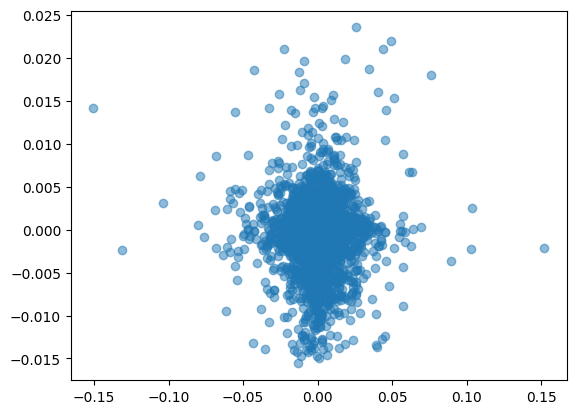

In [11]:
plt.scatter(all_targets, all_preds, alpha=0.5)

In [12]:
# model.feature_importances_
pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

,feature,importance
25,price_ema_diff_12,0.054930
58,rolling_beta_90d,0.053233
26,macd_hist,0.041502
16,ret_from_today_high,0.037630
12,ret_from_prev_high,0.035612
14,ret_from_prev_low,0.025724
15,log_price_range,0.024604
13,close_to_low,0.023660
21,strev_24,0.023594
39,skew_30d,0.022327


In [13]:
all_preds = []
all_targets = []
for train_df, test_df in zip(train_dfs, test_dfs):
    X_train = train_df.drop(columns = ['date'])[:-1]
    y_train = train_df['log_return'][1:]

    X_test = test_df.drop(columns = ['date'])[:-1]
    y_test = test_df['log_return'][1:]
    break
    model = MLPRegressor(
        hidden_layer_sizes=(64, 32, 16),
        activation='relu',
        solver='adam',
        alpha=0.01,
        batch_size=256,
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10,
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    all_preds.extend(preds)
    all_targets.extend(y_test)

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

In [345]:
mse = mean_squared_error(all_targets, all_preds)
mae = mean_absolute_error(all_targets, all_preds)
r2 = r2_score(all_targets, all_preds)
print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"R^2 Score: {r2:.6f}")

Mean Squared Error: 0.000751
Mean Absolute Error: 0.019389
R^2 Score: -2.166399


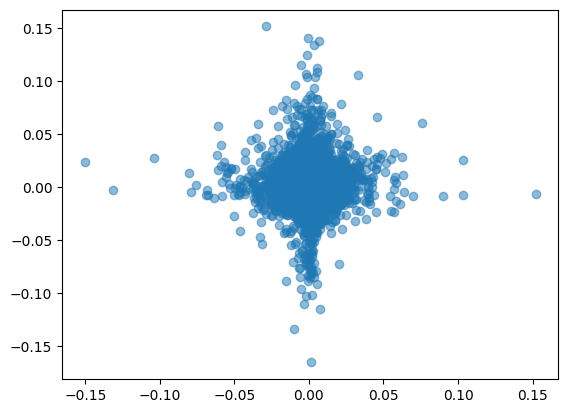

In [346]:
plt.scatter(all_targets, all_preds, alpha=0.5)

In [ ]:
Mean Squared Error: 0.000751
Mean Absolute Error: 0.019389
R^2 Score: -2.166399


In [14]:
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size=256,
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, batch_size=256, early_stopping=True,
             hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42)

In [15]:
preds = model.predict(X_train_scaled)
mse = mean_squared_error(y_train, preds)
mae = mean_absolute_error(y_train, preds)
r2 = r2_score(y_train, preds)
print(f"Train Mean Squared Error: {mse:.6f}")
print(f"Train Mean Absolute Error: {mae:.6f}")
print(f"Train R^2 Score: {r2:.6f}")

Train Mean Squared Error: 0.000211
Train Mean Absolute Error: 0.010296
Train R^2 Score: 0.590756


In [16]:
preds = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"R^2 Score: {r2:.6f}")

Mean Squared Error: 0.000417
Mean Absolute Error: 0.015254
R^2 Score: -2.809367


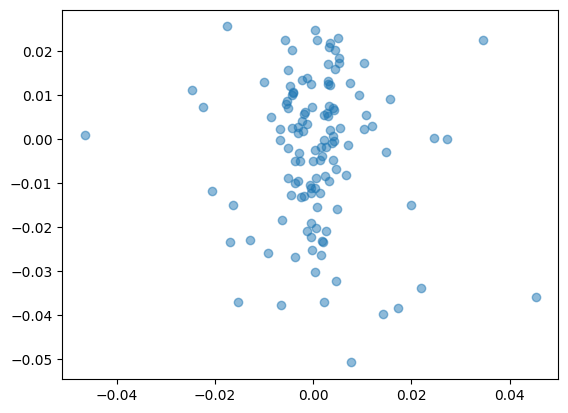

In [17]:
plt.scatter(y_test, preds, alpha=0.5)

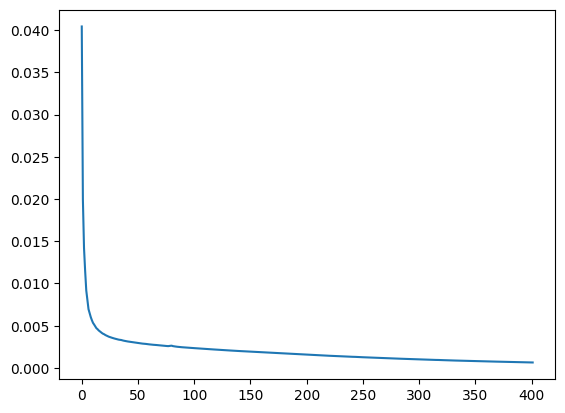

In [18]:
plt.plot(model.loss_curve_)

In [ ]:

windows = ["8h", "24h", "3d", "7d", "14d", "30d", "60d"]
for window in windows:
    df[f'volume_{window}'] = df['volume'].rolling(window).sum()
    df['pct_range_24h'] = (df['high'].rolling("24h").max() - df['close']) / (df['high'].rolling("24h").max() - df['low'].rolling("24h").min())

df['volatility_24h'] = df['ret_from_prev_close'].rolling("30d").std()
df['volatility_7d'] = df['ret_from_prev_close'].rolling("7d").std()
df['volatility_30d'] = df['ret_from_prev_close'].rolling("30d").std()


df['pos_frac_8h'] = df['ret_from_prev_close'].gt(0).rolling("8h").mean()
df['pos_frac_24h'] = df['ret_from_prev_close'].gt(0).rolling("24h").mean()
df['pos_frac_7d'] = df['ret_from_prev_close'].gt(0).rolling("7d").mean()
df['pos_frac_30d'] = df['ret_from_prev_close'].gt(0).rolling("30d").mean()

# df['skew_8h'] = df['ret_from_prev_close'].rolling("8h").skew()
# df['kurt_8h'] = df['ret_from_prev_close'].rolling("8h").kurt()
# df['skew_24h'] = df['ret_from_prev_close'].rolling("24h").skew()
# df['kurt_24h'] = df['ret_from_prev_close'].rolling("24h").kurt()
df['skew_7d'] = df['ret_from_prev_close'].rolling("7d").skew()
df['kurt_7d'] = df['ret_from_prev_close'].rolling("7d").kurt()
df['skew_30d'] = df['ret_from_prev_close'].rolling("30d").skew()
df['kurt_30d'] = df['ret_from_prev_close'].rolling("30d").kurt()

df['pct_sharpe_24h'] = df['ret_from_prev_close'].rolling("24h").mean() / df['ret_from_prev_close'].rolling("24h").std()
df['pct_sharpe_7d'] = df['ret_from_prev_close'].rolling("7d").mean() / df['ret_from_prev_close'].rolling("7d").std()
df['pct_sharpe_30d'] = df['ret_from_prev_close'].rolling("30d").mean() / df['ret_from_prev_close'].rolling("30d").std()

lv = np.log(df['volume'])
df['log_z_volume_24h'] = (lv - lv.rolling("24h").mean()) / lv.rolling("24h").std()
df['log_z_volume_7d'] = (lv - lv.rolling("7d").mean()) / lv.rolling("7d").std()
df['log_z_volume_30d'] = (lv - lv.rolling("30d").mean()) / lv.rolling("30d").std()

df["z_price_24h"] = (df['close'] - df['close'].rolling("24h").mean()) / df['close'].rolling("24h").std()
df["z_price_7d"] = (df['close'] - df['close'].rolling("7d").mean()) / df['close'].rolling("7d").std()
df["z_price_30d"] = (df['close'] - df['close'].rolling("30d").mean()) / df['close'].rolling("30d").std()

df["z_return_24h"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("24h").mean()) / df['ret_from_prev_close'].rolling("24h").std()
df["z_return_7d"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("7d").mean()) / df['ret_from_prev_close'].rolling("7d").std()
df["z_return_30d"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("30d").mean()) / df['ret_from_prev_close'].rolling("30d").std()

df["8h_ma"] = df['close'].rolling("8h").mean()
df["24h_ma"] = df['close'].rolling("24h").mean()
df["2d_ma"] = df['close'].rolling("2d").mean()
df["7d_ma"] = df['close'].rolling("7d").mean()
df["30d_ma"] = df['close'].rolling("30d").mean()
df.dropna(inplace=True)

In [23]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.1)
test_size = len(df) - train_size - val_size
train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

X_train = train.drop(columns=['open', 'high', 'low', 'close', 'volume', 'return', 'log_return'])[:-1]
y_train = train.log_return[1:]
X_val = val.drop(columns=['open', 'high', 'low', 'close', 'volume', 'return', 'log_return'])[:-1]
y_val = val.log_return[1:]
X_test = test.drop(columns=['open', 'high', 'low', 'close', 'volume', 'return', 'log_return'])[:-1]
y_test = test.log_return[1:]

In [24]:
res = {"rmse": [], "r2": []}

for i in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca   = pca.transform(X_val)

    model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
    )
    # train on the reduced data
    model.fit(X_train_pca, y_train)

    # predict on the reduced validation set
    y_pred = model.predict(X_val_pca)
    rmse   = np.sqrt(mean_squared_error(y_val, y_pred))
    r2     = r2_score(y_val, y_pred)

    res["rmse"].append(rmse)
    res["r2"].append(r2)
    print(f"Components: {i}, RMSE: {rmse:.6f}, R2: {r2:.6f}")

res_df = pd.DataFrame(res)

Components: 1, RMSE: 0.020070, R2: -0.017618
Components: 2, RMSE: 0.019989, R2: -0.009454
Components: 3, RMSE: 0.020214, R2: -0.032257
Components: 4, RMSE: 0.020223, R2: -0.033200
Components: 5, RMSE: 0.020102, R2: -0.020910
Components: 6, RMSE: 0.020114, R2: -0.022099
Components: 7, RMSE: 0.020096, R2: -0.020250
Components: 8, RMSE: 0.020140, R2: -0.024709
Components: 9, RMSE: 0.020034, R2: -0.013929
Components: 10, RMSE: 0.020069, R2: -0.017566
Components: 11, RMSE: 0.020020, R2: -0.012517
Components: 12, RMSE: 0.019967, R2: -0.007149
Components: 13, RMSE: 0.020010, R2: -0.011566
Components: 14, RMSE: 0.019918, R2: -0.002246
Components: 15, RMSE: 0.019899, R2: -0.000348
Components: 16, RMSE: 0.019912, R2: -0.001668
Components: 17, RMSE: 0.019895, R2: 0.000088
Components: 18, RMSE: 0.019934, R2: -0.003887
Components: 19, RMSE: 0.019914, R2: -0.001835
Components: 20, RMSE: 0.019995, R2: -0.010056


<Axes: >

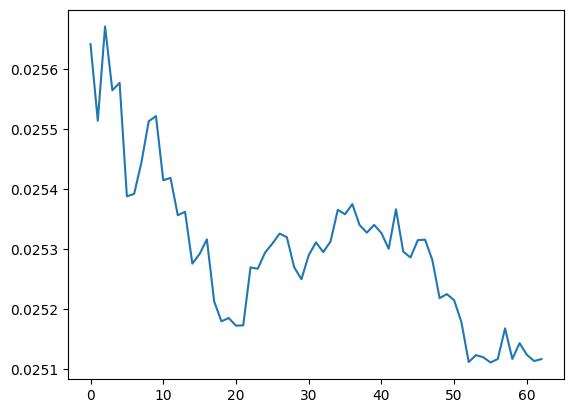

In [73]:
res_df.rmse.plot()

In [14]:
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [15]:
r2_score(y_test, y_pred)

-0.008536488979632884

In [16]:
mae

0.003966595598427147

In [ ]:
df['day_of_week'] = df.index.dayofweek                    # 0 = Monday, 6 = Sunday
df['no_trading_hrs'] = df.index.diff().total_seconds() / 3600
df['date'] = df.index.normalize()
df['ret_from_today_high'] = df['close'] / (df.groupby('date')['high'].cummax()) - 1
df['ret_from_today_low'] = df['close'] / (df.groupby('date')['low'].cummin()) - 1
df['ret_from_prev_high'] = df['close'] / df['high'].shift(1) - 1
df['ret_from_prev_low'] = df['close'] / df['low'].shift(1)  - 1
df['ret_from_prev_close'] = df['close'].pct_change()

lv = np.log(df['volume'])

windows = [8, 24, 72, 168, 336, 720, 1440]
for window in windows:
    t_window = f'{window}h'
    df[f'volume_{t_window}'] = df['volume'].rolling(t_window).sum()
    df[f'return_from_{t_window}_high'] = df['close'] / df['high'].rolling(t_window).max() - 1
    df[f'return_from_{t_window}_low'] = df['close'] / df['low'].rolling(t_window).min() - 1
    df[f'pct_range_{t_window}'] = (df['high'].rolling(t_window).max() - df['close']) / (df['high'].rolling(t_window).max() - df['low'].rolling(t_window).min())
    df[f'volatility_{t_window}'] = df['ret_from_prev_close'].rolling(t_window).std()
    df[f'pos_frac_{t_window}'] = df['ret_from_prev_close'].gt(0).rolling(t_window).mean()
    df[f'skew_{t_window}'] = df['ret_from_prev_close'].rolling(t_window).skew()
    df[f'kurt_{t_window}'] = df['ret_from_prev_close'].rolling(t_window).kurt()
    df[f'pct_sharpe_{t_window}'] = df['ret_from_prev_close'].rolling(t_window).mean() / df['ret_from_prev_close'].rolling(t_window).std()
    df[f'log_z_volume_{t_window}'] = (lv - lv.rolling(t_window).mean()) / lv.rolling(t_window).std()
    df[f'z_price_{t_window}'] = (df['close'] - df['close'].rolling(t_window).mean()) / df['close'].rolling(t_window).std()
    df[f'ma_{t_window}'] = df['close'].rolling(t_window).mean()
    df[f'vwap_{t_window}'] = (df['close'] * df['volume']).rolling(t_window).sum() / df['volume'].rolling(t_window).sum()
    df[f'z_volume_{t_window}'] = (df['volume'].rolling(window).sum() - df['volume'].rolling(window).sum().rolling(f'{window * 4}h').mean()) / df['volume'].rolling(window).sum().rolling(f'{window * 4}h').std()

Original number of features: 107
Reduced number of features: 28


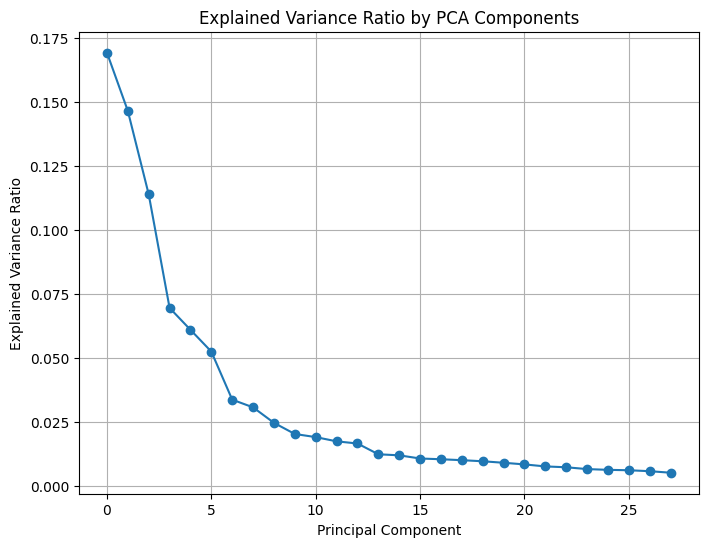

In [50]:
# pca
from sklearn.decomposition import PCA
# plot components
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [51]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
)
model.fit(X_pca, y)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=3,
                      n_jobs=-1, random_state=42)

In [52]:
X_test = test[feats]
X_test = scaler.transform(X_test)
X_test_pca = pca.transform(X_test)[:-1]
y_pred = model.predict(X_test_pca)

mse = mean_squared_error(test["ret_from_prev_close"].shift(-1).dropna(), y_pred)
mae = mean_absolute_error(test["ret_from_prev_close"].shift(-1).dropna(), y_pred)
r2 = r2_score(test["ret_from_prev_close"].shift(-1).dropna(), y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.037595854158983e-05
Mean Absolute Error: 0.0039471549028838
R^2 Score: -0.0013526731482864651


In [552]:
model.feature_importances_

array([0.03689229, 0.0077324 , 0.01072508, 0.01103343, 0.10589878,
       0.01246557, 0.01519255, 0.00520396, 0.07810142, 0.06216988,
       0.05611432, 0.06364463, 0.01300216, 0.03392986, 0.03737762,
       0.02071884, 0.01187437, 0.00857119, 0.00653432, 0.00996102,
       0.05061071, 0.0094583 , 0.00958169, 0.00805635, 0.03814849,
       0.00795396, 0.00729477, 0.01512883, 0.00741634, 0.00929413,
       0.01126995, 0.00663067, 0.0082355 , 0.0458348 , 0.08128132,
       0.01935962, 0.01029588, 0.00797184, 0.01097351, 0.00639877,
       0.0216609 ])

In [ ]:
# df['day_of_week'] = df.index.dayofweek                    # 0 = Monday, 6 = Sunday
# df['no_trading_hrs'] = df.index.diff().total_seconds() / 3600
# df['date'] = df.index.normalize()
# df['ret_from_today_high'] = df['close'] / (df.groupby('date')['high'].cummax()) - 1
# df['ret_from_today_low'] = df['close'] / (df.groupby('date')['low'].cummin()) - 1
# df['ret_from_prev_high'] = df['close'] / df['high'].shift(1) - 1
# df['ret_from_prev_low'] = df['close'] / df['low'].shift(1)  - 1
# df['ret_from_prev_close'] = df['close'].pct_change()

# windows = ["8h", "24h", "3d", "7d", "14d", "30d", "60d"]
# for window in windows:
#     df[f'volume_{window}'] = df['volume'].rolling(window).sum()
#     df['pct_range_24h'] = (df['high'].rolling("24h").max() - df['close']) / (df['high'].rolling("24h").max() - df['low'].rolling("24h").min())

# df['volatility_24h'] = df['ret_from_prev_close'].rolling("30d").std()
# df['volatility_7d'] = df['ret_from_prev_close'].rolling("7d").std()
# df['volatility_30d'] = df['ret_from_prev_close'].rolling("30d").std()


# df['pos_frac_8h'] = df['ret_from_prev_close'].gt(0).rolling("8h").mean()
# df['pos_frac_24h'] = df['ret_from_prev_close'].gt(0).rolling("24h").mean()
# df['pos_frac_7d'] = df['ret_from_prev_close'].gt(0).rolling("7d").mean()
# df['pos_frac_30d'] = df['ret_from_prev_close'].gt(0).rolling("30d").mean()

# df['skew_8h'] = df['ret_from_prev_close'].rolling("8h").skew()
# df['kurt_8h'] = df['ret_from_prev_close'].rolling("8h").kurt()
# df['skew_24h'] = df['ret_from_prev_close'].rolling("24h").skew()
# df['kurt_24h'] = df['ret_from_prev_close'].rolling("24h").kurt()
# df['skew_7d'] = df['ret_from_prev_close'].rolling("7d").skew()
# df['kurt_7d'] = df['ret_from_prev_close'].rolling("7d").kurt()
# df['skew_30d'] = df['ret_from_prev_close'].rolling("30d").skew()
# df['kurt_30d'] = df['ret_from_prev_close'].rolling("30d").kurt()

# df['pct_sharpe_24h'] = df['ret_from_prev_close'].rolling("24h").mean() / df['ret_from_prev_close'].rolling("24h").std()
# df['pct_sharpe_7d'] = df['ret_from_prev_close'].rolling("7d").mean() / df['ret_from_prev_close'].rolling("7d").std()
# df['pct_sharpe_30d'] = df['ret_from_prev_close'].rolling("30d").mean() / df['ret_from_prev_close'].rolling("30d").std()

# lv = np.log(df['volume'])
# df['log_z_volume_24h'] = (lv - lv.rolling("24h").mean()) / lv.rolling("24h").std()
# df['log_z_volume_7d'] = (lv - lv.rolling("7d").mean()) / lv.rolling("7d").std()
# df['log_z_volume_30d'] = (lv - lv.rolling("30d").mean()) / lv.rolling("30d").std()

# df["z_price_24h"] = (df['close'] - df['close'].rolling("24h").mean()) / df['close'].rolling("24h").std()
# df["z_price_7d"] = (df['close'] - df['close'].rolling("7d").mean()) / df['close'].rolling("7d").std()
# df["z_price_30d"] = (df['close'] - df['close'].rolling("30d").mean()) / df['close'].rolling("30d").std()

# df["z_return_24h"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("24h").mean()) / df['ret_from_prev_close'].rolling("24h").std()
# df["z_return_7d"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("7d").mean()) / df['ret_from_prev_close'].rolling("7d").std()
# df["z_return_30d"] = (df['ret_from_prev_close'] - df['ret_from_prev_close'].rolling("30d").mean()) / df['ret_from_prev_close'].rolling("30d").std()

# df["8h_ma"] = df['close'].rolling("8h").mean()
# df["24h_ma"] = df['close'].rolling("24h").mean()
# df["2d_ma"] = df['close'].rolling("2d").mean()
# df["7d_ma"] = df['close'].rolling("7d").mean()
# df["30d_ma"] = df['close'].rolling("30d").mean()

# df['']